**Sentiment Analysis of Best-Selling Books Titles Using NLP**

**Introduction**

Sentiment analysis is a Natural Language Processing (NLP) technique used to determine emotional tone in textual data. This project analyzes sentiments of best-selling book titles to classify them as positive, negative, or neutral and understand emotional trends in book naming.

**Methodology**

Book titles were processed using the VADER sentiment lexicon. Each title was assigned a compound sentiment score and classified into Positive, Negative, or Neutral categories. Visualization techniques were applied to analyze sentiment distribution and its relationship with book ratings.

*Install and import library*

In [1]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

Load Dataset

In [4]:
df = pd.read_csv("best sellin books 2023.csv", encoding="Latin1")
df.head()

,id,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre
0,#1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,145747,Hardcover,$18.88,NaN,320.0,16-10-2018,Self-Improvement
1,#2,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7 out of 5 stars,395512,Hardcover,$11.05,NaN,640.0,07-11-2023,Fiction & Action & Adventure
2,#3,Spare,Prince Harry The Duke of Sussex,4.5 out of 5 stars,116101,Hardcover,$11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs
3,#4,Fourth Wing,Rebecca Yarros,4.8 out of 5 stars,472618,Paperback,$13.62,NaN,544.0,17-09-2024,Fiction & Action & Adventure
4,#5,The Woman in Me,Britney Spears,4.4 out of 5 stars,51520,Hardcover,$11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs


## **Data Limitation**

Due to the absence of review text data, book titles were used as textual input for sentiment analysis using the VADER lexicon.

In [5]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Book name'].apply(get_sentiment)
df[['Book name', 'Sentiment']].head()

,Book name,Sentiment
0,Atomic Habits: An Easy & Proven Way to Build G...,Positive
1,"Iron Flame (Standard Edition) (The Empyrean, 2)",Neutral
2,Spare,Neutral
3,Fourth Wing,Neutral
4,The Woman in Me,Neutral


In [6]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

,count
Sentiment,
Neutral,49
Positive,39
Negative,12


**Bar Graph**

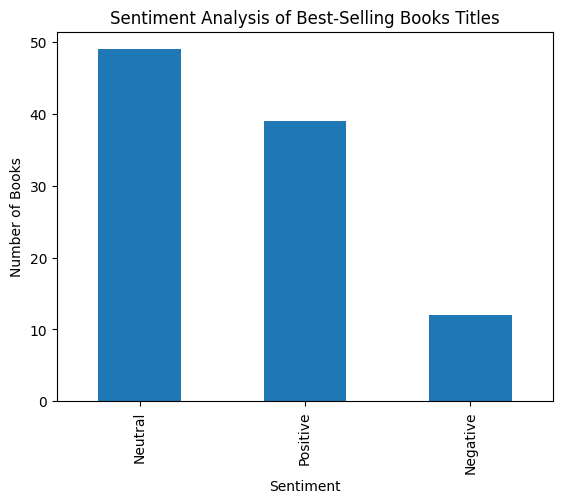

In [7]:
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Analysis of Best-Selling Books Titles")
plt.xlabel("Sentiment")
plt.ylabel("Number of Books")
plt.show()

### Sentiment Distribution Bar Chart Description

The bar chart shows the distribution of sentiments in book titles. Most book titles fall under the Positive and Neutral categories, while fewer titles are classified as Negative. This indicates that publishers prefer using optimistic and neutral emotional words in book titles to attract readers.

**Pie Chart**

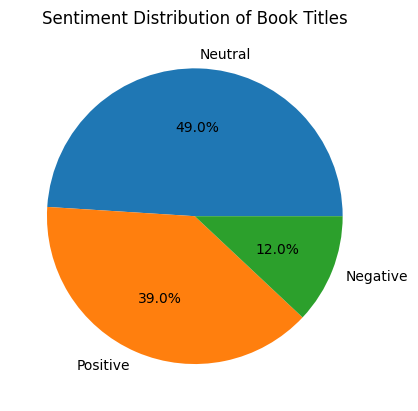

In [8]:
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Distribution of Book Titles")
plt.ylabel("")
plt.show()

### Sentiment Distribution Of Book Title Pie Chart Description

The pie chart represents the percentage distribution of sentiments among book titles. A large portion of titles are positive, followed by neutral titles, and a small percentage are negative. This suggests that positive emotional tone is commonly used in book naming strategies, which may influence reader interest and marketing success.

**Sentiment Score Column**

In [10]:
df['Sentiment_Score'] = df['Book name'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
df[['Book name', 'Sentiment', 'Sentiment_Score']].head()

,Book name,Sentiment,Sentiment_Score
0,Atomic Habits: An Easy & Proven Way to Build G...,Positive,0.3182
1,"Iron Flame (Standard Edition) (The Empyrean, 2)",Neutral,0.0000
2,Spare,Neutral,0.0000
3,Fourth Wing,Neutral,0.0000
4,The Woman in Me,Neutral,0.0000


### Sentiment Score Column Description

The sentiment score represents the emotional intensity of each book title. Scores range from -1 (very negative) to +1 (very positive). Titles with higher positive scores indicate positive emotional tone, while negative scores indicate negative emotional tone. This numeric representation helps quantify sentiment strength.

**Sentiment vs Rating Graph**

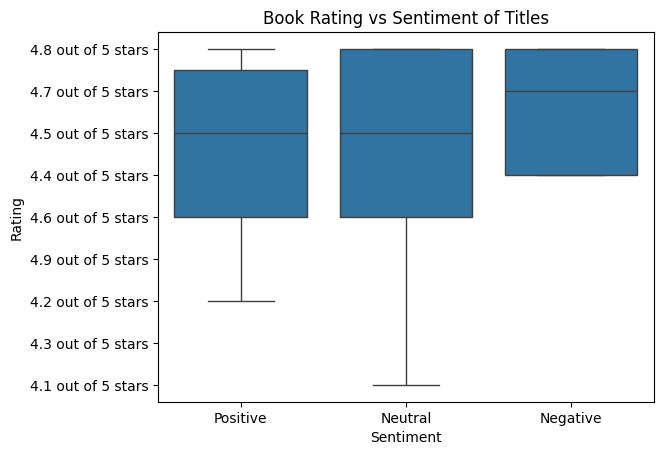

In [11]:
import seaborn as sns

sns.boxplot(x='Sentiment', y='Rating', data=df)
plt.title("Book Rating vs Sentiment of Titles")
plt.show()

### Sentiment Vs Rating Graph Description

The boxplot compares book ratings across different sentiment categories. The results show that ratings are generally high across all sentiment groups, indicating that sentiment of the title does not strongly influence book ratings. Readers appear to evaluate books based on content rather than emotional tone of the title.

**Results**

The analysis shows that most book titles have positive or neutral sentiment, indicating optimistic naming strategies by publishers. Negative sentiment titles are fewer. Sentiment does not significantly affect book ratings, suggesting that title emotion and reader ratings are independent and that the book popularity depends more on content quality than title sentiment.

**Conclusion**

This project demonstrates the use of NLP techniques for sentiment classification. The results indicate that positive emotional wording is commonly used in book titles. Sentiment analysis can help publishers and marketers understand public perception and design attractive titles.